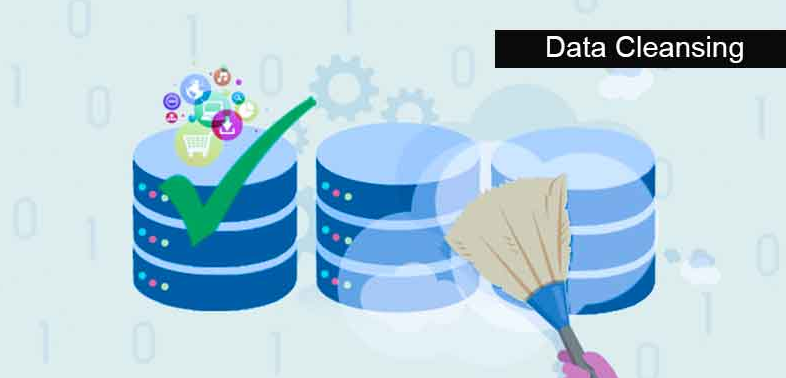

### DataSet - 1

In [14]:
import pandas as pd
df = pd.read_csv('D:\ProductSales.csv')
df.head()

,Product_ID,29-08-2013,31-08-2013,9/2/2013,9/4/2013,9/6/2013,9/8/2013,9/10/2013,9/12/2013,14-09-2013,...,24-09-2013,26-09-2013,28-09-2013,30-09-2013,10/2/2013,10/4/2013,10/6/2013,10/8/2013,10/10/2013,10/12/2013
0,542,2114,2274,2491,2660,2727,2887,2930,3119,3204,...,3554,3624.0,3706,3746.0,3795.0,3832.0,3897,3923.0,3985.0,4048
1,124,151,275,570,750,813,1066,1164,1558,1756,...,2710,2942.0,3258,3354.0,3475.0,3654.0,3911,4024.0,4125.0,4277
2,580,6,7,7,7,8,8,9,10,10,...,11,11.0,11,11.0,11.0,11.0,11,11.0,11.0,11
3,967,1005,1128,1326,1455,1507,1621,1637,1723,1746,...,1878,1892.0,1914,1924.0,1929.0,1941.0,1952,1955.0,1959.0,1963
4,241,996,1175,1304,1396,1432,1559,1570,1638,1655,...,2032,2156.0,2252,2312.0,2387.0,2459.0,2544,2614.0,2693.0,2736


This file contans the month wise product sales of various products (Product Ids).

### DataType

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product_ID  479 non-null    int64  
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   9/2/2013    479 non-null    int64  
 4   9/4/2013    479 non-null    int64  
 5   9/6/2013    479 non-null    int64  
 6   9/8/2013    479 non-null    int64  
 7   9/10/2013   479 non-null    int64  
 8   9/12/2013   479 non-null    object 
 9   14-09-2013  479 non-null    object 
 10  16-09-2013  479 non-null    object 
 11  18-09-2013  479 non-null    object 
 12  20-09-2013  479 non-null    object 
 13  22-09-2013  479 non-null    object 
 14  24-09-2013  479 non-null    int64  
 15  26-09-2013  257 non-null    float64
 16  28-09-2013  479 non-null    int64  
 17  30-09-2013  222 non-null    float64
 18  10/2/2013   220 non-null    float64
 19  10/4/2013   221 non-null    f

While all the columns store numeric values; the datatype of a few columns is 'Object'. 
Convert the clumns to numeric type .

### Type Cast to numeric 

In [16]:
cols = ['9/12/2013','14-09-2013','16-09-2013','18-09-2013','20-09-2013','22-09-2013']
for col in cols:
    df[col] = pd.to_numeric(df[col],errors='coerce')

- cross check for either the entire dataset - df.info() or a set of columns

In [112]:
df['18-09-2013'].dtype

dtype('float64')

When applying pd.to_numeric to convert values to a numeric type; the datatype gets updated to float64; this is because of the presence of NaN values 

Convert to integer
- if there are no NaN values present in a dataset; the type can be converted into an integer as

In [ ]:
import numpy as np
df['columns'] = df['column'].astype(np.int64)

Convert to String
- Likewise to convert to String

In [ ]:
df['columns'] = df['column'].astype("string")

String Replace Function 

### Aggregate into categories

Categorise the dates into seasons as below :

- June, July and August: Summer.
- September, October and November: Autumn.
- December, January and February: Winter.
- March, April and May: Spring.

##### Method -1 

- A programmatical way of using loops and inbuilt features in Pandas

In [105]:
df['SUMMER'] = 0
df['AUTUMN'] = 0
df['WINTER'] = 0
df['SPRING'] = 0


cols = ['29-08-2013', '31-08-2013', '9/2/2013', '9/4/2013', '9/6/2013', '9/8/2013', '9/10/2013', '9/12/2013', 
        '14-09-2013','16-09-2013', '18-09-2013', '20-09-2013', '22-09-2013', '24-09-2013','26-09-2013', 
        '28-09-2013', '30-09-2013', '10/2/2013', '10/4/2013','10/6/2013', '10/8/2013', '10/10/2013', 
        '10/12/2013']

#the date related columns are in 2 formats as below.

for x in cols:
    try:
        dt =datetime.strptime(x, "%d/%m/%Y")
    except TypeError:
        dt = datetime.strptime(x, "%d-%m-%Y")
    except ValueError:
        dt = datetime.strptime(x, "%d-%m-%Y")
    #print(dt.month)
    if dt.month in [6,7,8]:
        df['SUMMER'] = df['SUMMER'] + df[x]
    elif dt.month in [9,10,11]:
        df['AUTUMN'] = df['AUTUMN'] + df[x]
    elif dt.month in [12,1,2]:
        df['WINTER'] = df['WINTER'] + df[x]
    elif dt.month in [3,4,5]:
        df['SPRING'] = df['SPRING'] + df[x]
    else:
        pass

##### Method -2 

- Applying Lambda functions

In [109]:
df['Spring'] = df.apply(lambda x: x['9/4/2013'] +  x['10/4/2013'], axis=1)

Repeat the above for the other seasons as well 

In [113]:
df.head()

,Product_ID,29-08-2013,31-08-2013,9/2/2013,9/4/2013,9/6/2013,9/8/2013,9/10/2013,9/12/2013,14-09-2013,...,10/4/2013,10/6/2013,10/8/2013,10/10/2013,10/12/2013,SUMMER,AUTUMN,WINTER,SPRING,Spring
0,542,2114,2274,2491,2660,2727,2887,2930,3119.0,3204.0,...,3832.0,3897,3923.0,3985.0,4048,17822.0,38212.0,13453.0,6492.0,6492.0
1,124,151,275,570,750,813,1066,1164,1558.0,1756.0,...,3654.0,3911,4024.0,4125.0,4277,10240.0,27732.0,9880.0,4404.0,4404.0
2,580,6,7,7,7,8,8,9,10.0,10.0,...,11.0,11,11.0,11.0,11,51.0,115.0,39.0,18.0,18.0
3,967,1005,1128,1326,1455,1507,1621,1637,1723.0,1746.0,...,1941.0,1952,1955.0,1959.0,1963,9168.0,20186.0,6941.0,3396.0,3396.0
4,241,996,1175,1304,1396,1432,1559,1570,1638.0,1655.0,...,2459.0,2544,2614.0,2693.0,2736,10320.0,21837.0,8065.0,3855.0,3855.0


### DataSet - 2

- This dataset contains the details from a Bank marketing campaign. 
- The columns in this dataset contain values associated with the marketing campaign 

In [124]:
import pandas as pd
data = pd.read_csv('D:\BankMarketing.csv', skiprows=2)

A look at the dataset

In [125]:
data.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


### The column - jobedu  
### Split that into Job and education 

In [123]:
data.loc[1,'jobedu'].split(',')[1]

'secondary'

JOB

In [138]:
for i in range(len(data)):
    data.loc[i,'JOB'] = (data.loc[i,'jobedu'].split(',')[0])

EDUCATION

In [140]:
for i in range(len(data)):
    data.loc[i,'EDUCATION'] = data.loc[i,'jobedu'].split(',')[1]

VERIFY

In [141]:
data[['jobedu','JOB','EDUCATION']].head(5)

,jobedu,JOB,EDUCATION
0,"management,tertiary",management,tertiary
1,"technician,secondary",technician,secondary
2,"entrepreneur,secondary",entrepreneur,secondary
3,"blue-collar,unknown",blue-collar,unknown
4,"unknown,unknown",unknown,unknown


### Working with the 'pdays' column i.e days since previous campaign

- Check for NULL values

In [147]:
data.pdays.isnull().sum()

0

- Summary Statistics

In [148]:
data.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

- A good number of values are -1 . To handle -1; we could instead change it to NaN, so it does NOT screw the summary statistics 
- There are multiple ways to impute an erroneous value; however we just update to NaN as we aren't sure of the significance of this column

In [154]:
import numpy as np
data.loc[data.pdays < 0, "pdays"] = np.NaN

In [155]:
data.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

### Standardizing Values

In [158]:
data.duration.unique()

array(['261 sec', '151 sec', '76 sec', ..., '20.7666666666667 min',
       '25.9333333333333 min', '16.2833333333333 min'], dtype=object)

The data comprises of both minutes and seconds; standardize to minutes

In [159]:
data.duration = data.duration.apply( lambda x : float(x.split()[0])/60 if x.find("sec")>0 else x.split()[0])

In [160]:
data.duration.unique()

array([4.35, 2.5166666666666666, 1.2666666666666666, ...,
       '20.7666666666667', '25.9333333333333', '16.2833333333333'],
      dtype=object)